# 最急降下法

## データ準備

In [2]:
import pandas as pd
df = pd.read_csv('sample_data.csv')

In [3]:
df

,space,rent
0,20,13.958824
1,25,11.533805
2,28,14.269547
3,30,18.722680
4,36,19.602674
5,51,16.068166
6,55,23.183599
7,62,22.212595
8,83,29.357010
9,103,37.565129


## データ可視化

<AxesSubplot:xlabel='space', ylabel='rent'>

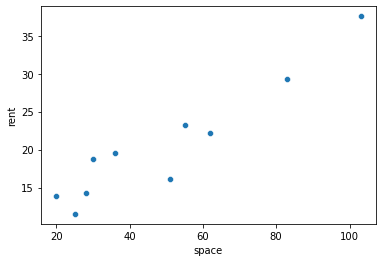

In [4]:
import seaborn as sns
sns.scatterplot(x='space', y='rent', data=df)

## 損失関数定義

In [5]:
import numpy as np
x = df['space'].values
y = df['rent'].values

def loss_func(theta_0, theta_1, x, y):
    return np.mean((y - (theta_0 + theta_1 * x ))**2)

loss_func(5, 7, x=x, y=y)

138703.20244638805

## 損失関数の可視化

In [6]:
import matplotlib.pyplot as plt
from itertools import product

n0 = n1 = 300

min_0 = -20
max_0 = 20
min_1 = -1
max_1 = 1
theta_0 = np.linspace(min_0, max_0, n0)
theta_1 = np.linspace(min_1, max_1, n1)
# meshgridはhttps://disassemble-channel.com/np-meshgrid/を参考にする
theta_0_ax, theta_1_ax = np.meshgrid(theta_0, theta_1)
product(theta_0, theta_1)
z = [loss_func(*param, x, y) for param in list(product(theta_0, theta_1))]
Z = np.array(z).reshape(n0, n1)

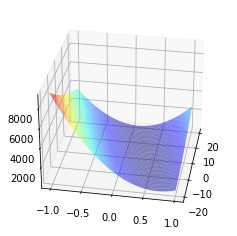

In [7]:
import matplotlib.pyplot as plt
ax = plt.axes(projection='3d')
# cmapはカラーマッピング、 alphaは透明度を表している
ax.plot_surface(X=theta_0_ax.T, Y=theta_1_ax.T, Z=Z, cmap='jet', alpha=0.5)
# Axesオブジェクト（plt.gca()で取得される）のX軸の方向を反転させる操作
plt.gca().invert_xaxis()
#見る位置の変更
ax.view_init(30, 10)
plt.show()

## 最急降下法

In [8]:
# np.ramdom.seed(0)
# theta_0_init = np.random.uniform(min_0, max_0)
# theta_1_init = np.random.uniform(min_1, max_1)

theta_0_init = -5
theta_1_init = -0.5

def update_theta_0(theta_0, theta_1, x, y, alpha):
    return theta_0 - alpha * 2 * np.mean((theta_0 + theta_1 * x) - y)

def update_theta_1(theta_0, theta_1, x, y, alpha):
    return theta_1 - alpha * 2 * np.mean(((theta_0 + theta_1 * x) - y) * x)

epochs = 100000
alpha = 0.00005

theta_0_hist = []
theta_1_hist = []
#初期化
theta_0_hist.append(theta_0_init)
theta_1_hist.append(theta_1_init)

for _ in range(epochs):
    updated_theta_0 = update_theta_0(theta_0_hist[-1], theta_1_hist[-1], x, y, alpha)
    updated_theta_1 = update_theta_1(theta_0_hist[-1], theta_1_hist[-1], x, y, alpha)
    theta_0_hist.append(updated_theta_0)
    theta_1_hist.append(updated_theta_1)


In [9]:
print(theta_0_hist[-1])
print(theta_1_hist[-1])

5.692313583745944
0.2972194648547114


## 結果の描画

### 収束の描画

In [10]:
loss_hist = [loss_func(*param, x, y) for param in zip(theta_0_hist, theta_1_hist)]

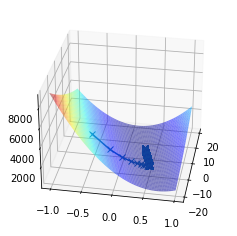

In [11]:
ax = plt.axes(projection='3d')
# 3Dプロット上に直線をプロット
ax.plot(theta_0_hist, theta_1_hist, loss_hist, 'x-')
# cmapはカラーマッピング、 alphaは透明度を表している
ax.plot_surface(X=theta_0_ax.T, Y=theta_1_ax.T, Z=Z, cmap='jet', alpha=0.5)
# Axesオブジェクト（plt.gca()で取得される）のX軸の方向を反転させる操作
plt.gca().invert_xaxis()
# 見る位置の変更
ax.view_init(30, 10)
plt.show()

### 等高線の描画

Text(0, 0.5, 'theta 0')

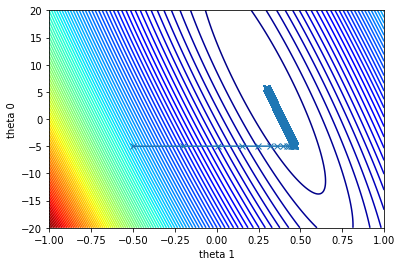

In [12]:
plt.contour(theta_1_ax.T, theta_0_ax.T, Z, 100, cmap='jet')
plt.plot(theta_1_hist, theta_0_hist, 'x-')
plt.xlabel('theta 1')
plt.ylabel('theta 0')

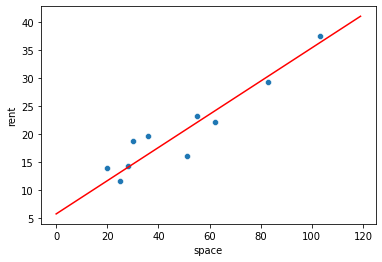

In [13]:
sns.scatterplot(x='space', y='rent', data=df)
x_values = np.arange(120)
y_value = theta_0_hist[-1] + theta_1_hist[-1] * x_values
plt.plot(x_values, y_value, '-', color='r')

## 最急降下法の注意点

- 最適解ではなく局所解にたどり着くことがある
- 学習率が大きすぎると、いつまでたっても学習が進まない

# 正規方程式

$$　\theta = (X^TX)^{−1}XTy　$$

In [14]:
X = np.vstack((np.ones(len(x)), x)).T

In [15]:
best_sheta = np.linalg.inv(X.T.dot(X)) @ X.T.dot(y.T)

Text(0, 0.5, 'theta 0')

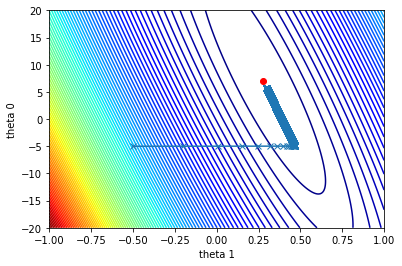

In [16]:
plt.contour(theta_1_ax.T, theta_0_ax.T, Z, 100, cmap='jet')
plt.plot(theta_1_hist, theta_0_hist, 'x-')
plt.scatter(best_sheta[1], best_sheta[0], c='red')
plt.xlabel('theta 1')
plt.ylabel('theta 0')

# scikit-learn 

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression()
# データの準備
x = df['space'].values
y = df['rent'].values
# reshape(-1, n)の-1はn列になるように自動で行を調整する
X = x.reshape(-1,1)
model.fit(X, y)

LinearRegression()

In [19]:
model.predict(X)

array([12.59366469, 13.96802274, 14.79263756, 15.34238078, 16.99161044,
       21.11468458, 22.21417102, 24.13827229, 29.91057608, 35.40800827])

In [20]:
# coefficient 係数
model.coef_

array([0.27487161])

In [21]:
# intercept 切片
model.intercept_

7.096232499908833

## 正規方程式の注意点

- 特徴量の数が多すぎると $$(X^TX)^{-1}$$ の計算に時間がかかる  
- <font color="red">多重共線性</font>：  
特徴量同士に強い相関があると逆行列を求める際に分母が0に近い値になるため $$(X^TX)^{-1}$$ を求めることができない
- 特徴量データがデータ数を上回る場合、回帰のパラメータを特定できない  
例：特徴量が2つでデータが1つの場合  
    1つの点から直線を特定することはできない

